# installing the librarys

In [7]:
!pip install matplotlib


In [8]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e876f312eb6ca88e272ccc3b2db93cea88d36084a15059c9d52626a7b9866b87
  Stored in directory: c:\users\hanns\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


# importing the data

In [4]:
import timeit as tm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#libery of AI
from sklearn import datasets, linear_model

In [5]:
traing_data = pd.read_csv('train.csv')

In [6]:
#visualize the normal data
traing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<AxesSubplot:title={'center':'LotArea'}>]], dtype=object)

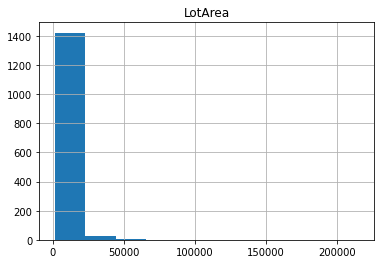

In [33]:
training_LotArea = traing_data.pivot_table(index= "Id", values= "LotArea")
training_LotArea.hist()

array([[<AxesSubplot:title={'center':'MoSold'}>]], dtype=object)

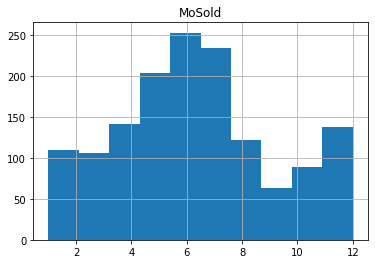

In [32]:
training_MoSold = traing_data.pivot_table(index= "Id", values= "MoSold")
training_MoSold.hist()

In [74]:
training_price = traing_data.pivot_table(index= "Id", values= "SalePrice")

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

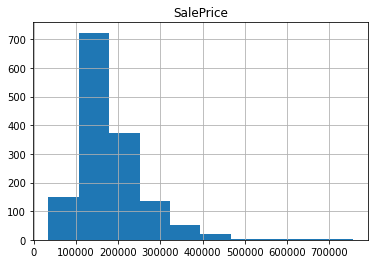

In [75]:
training_price.hist()

# Transformaciones lineales

### escalamiento max-min

In [58]:
MoSold_value = traing_data.MoSold
max_raw = max(MoSold_value)
min_raw = min(MoSold_value)
scaled = (2*MoSold_value - max_raw -min_raw)/(max_raw - min_raw)

### normalización Z-score

In [66]:
avg = np.average(MoSold_value)
std = np.std(MoSold_value)
z_scaled = (MoSold_value - avg)/std

(array([110., 106., 141., 204., 253., 234., 122.,  63.,  89., 138.]),
 array([-1.96911145, -1.56211106, -1.15511068, -0.7481103 , -0.34110991,
         0.06589047,  0.47289086,  0.87989124,  1.28689163,  1.69389201,
         2.10089239]),
 <BarContainer object of 10 artists>)

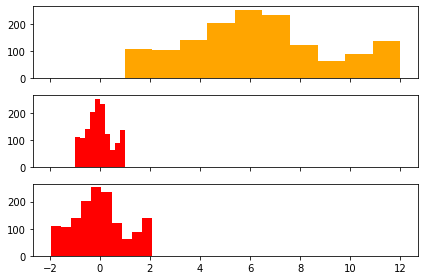

In [73]:
fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

axs[0].hist(training_MoSold, color= 'orange')
axs[1].hist(scaled, color= 'red')
axs[2].hist(z_scaled, color= 'red')


(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1.89792941, -1.34956464, -0.80119987, -0.2528351 ,  0.29552967,
         0.84389444,  1.39225921,  1.94062398,  2.48898875,  3.03735352,
         3.58571828]),
 <BarContainer object of 10 artists>)

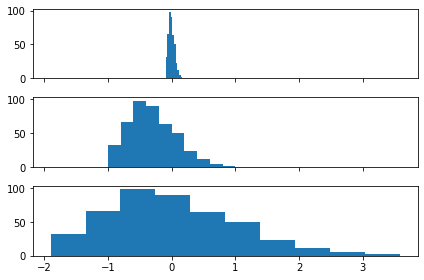

In [45]:
# escalamiento max-min
max_raw = max(raw.)
min_raw = min(raw)
scaled = (2*raw - max_raw -min_raw)/(max_raw - min_raw)

# normalización Z-score

avg = np.average(raw)
std = np.std(raw)
z_scaled = (raw - avg)/std

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)

# datos originales
axs[0].hist(raw)
# datos escalados
axs[1].hist(scaled)
# normalización Z-score

axs[2].hist(z_scaled)

In [46]:
# modelos para entrenamiento
def train_raw():
    #linear_model es importada de  sklearn para el entrenamiento del modelo
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

def train_z_scaled():
    linear_model.LinearRegression().fit(z_scaled, y)

In [48]:
#tiempos de ejecucion de cada modelo
raw_time = tm.timeit(train_raw, number = 100)
scaled_time = tm.timeit(train_raw, number = 100)
z_scaled_time = tm.timeit(train_raw, number = 100)
#{} this allows to print asometing from oud side so works as a variable and then use format()
print('trainning time for raw data : {} '.format(raw_time))
print('trainning time for scaled data : {}'.format(scaled_time))
print('trainning time for z_scaled data : {}'.format(z_scaled_time))

trainning time for raw data : 0.03201800000010735 
trainning time for scaled data : 0.02440200000000914
trainning time for z_scaled data : 0.02585300000009738


-- max-min scaling: mejor para datos uniformemente distribuidos --------
-- z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de gauss)

# Transformaciones no lineales

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

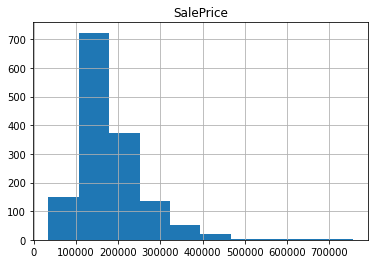

In [91]:
training_price.hist()

(array([ 28., 245., 487., 339., 186.,  99.,  44.,  21.,   7.,   4.]),
 array([0.06968686, 0.15341208, 0.2371373 , 0.32086252, 0.40458774,
        0.48831296, 0.57203818, 0.65576339, 0.73948861, 0.82321383,
        0.90693905]),
 <BarContainer object of 10 artists>)

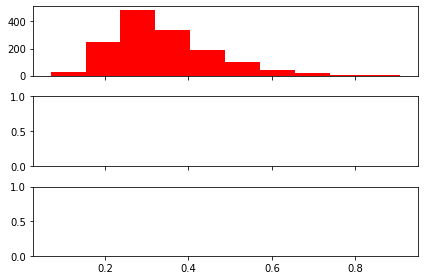

In [92]:
p = 500000

fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True)


f_tanh = training_price.apply(lambda x: np.tanh(x/p))

axs[0].hist(f_tanh, color= 'red')
#axs[2].hist(f_tanh, color= 'orange')
